# Find out survival rate of titanic ship passengers using decision tree

### 1. Import libraries and data

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

In [98]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Data exploration

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 3. Data cleaning

In [101]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [102]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [103]:
print("Number of duplicates:",len(df[df.duplicated()]))

Number of duplicates: 0


In [104]:
# data preparation

X = df.drop(['PassengerId','Survived','Name','SibSp','Ticket','Parch','Cabin','Embarked'],axis='columns')
y = df.Survived

In [105]:
le = LabelEncoder()
X.Sex = le.fit_transform(X.Sex)
X

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


### 4. Data visualization

<AxesSubplot:>

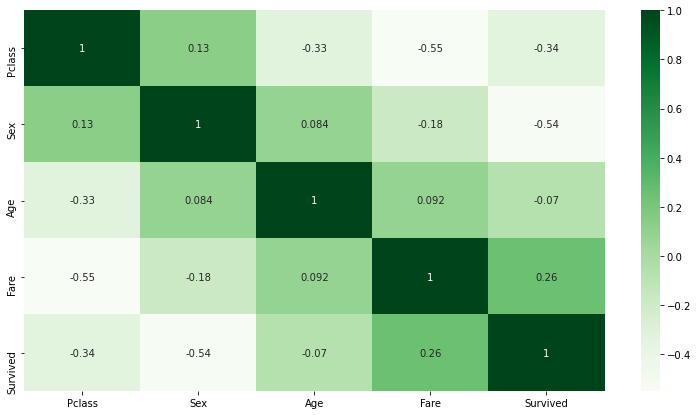

In [106]:
# check for multicollinearity

plt.figure(figsize = (13, 7))
sns.heatmap(pd.concat([X,y],axis='columns').corr(), annot = True, cmap = 'Greens')

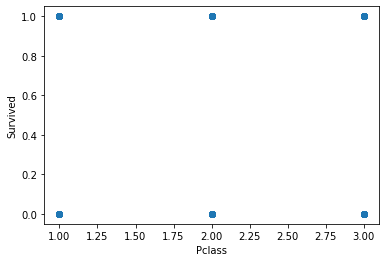

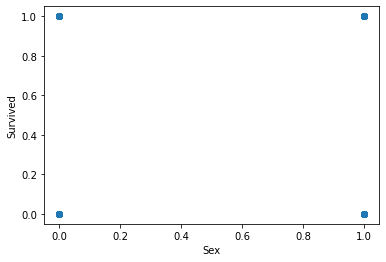

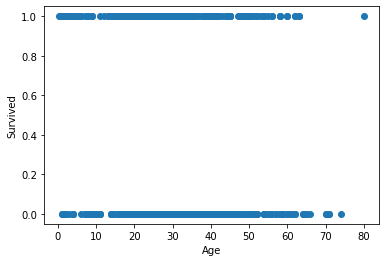

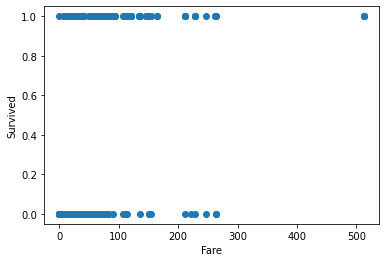

In [107]:
for i in X.columns:
    plt.figure(figsize=(6,4))
    plt.xlabel(i)
    plt.ylabel('Survived')
    plt.scatter(X[i],y)

In [108]:
# data preparation

sc = StandardScaler()
X = sc.fit_transform(X)

### 5. Model training

In [109]:
accuracy = {}

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=40),
}

for i in models.keys():
    
    models[i].fit(X,y)
    accuracy[i] = cross_val_score(models[i],X,y).mean()

### 6. Accuracy

In [110]:
data_models = pd.DataFrame(index=models.keys(), columns=['Accuracy'])
data_models['Accuracy'] = accuracy.values()
data_models

,Accuracy
Logistic Regression,0.788990
Decision Tree,0.774477
Random Forest Classifier,0.817099


### 7. Confusion matrix

<AxesSubplot:>

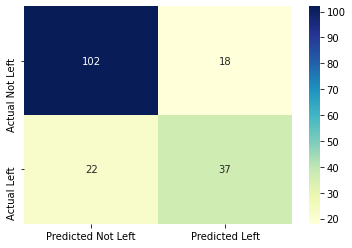

In [94]:
# confusion matrix for Logistic Regression

cm = confusion_matrix(y_test, models['Logistic Regression'].predict(X_test))
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted Not Left', 'Predicted Left'], index = ['Actual Not Left', 'Actual Left'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="YlGnBu")

<AxesSubplot:>

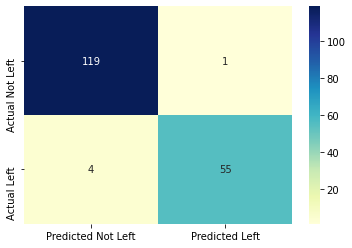

In [95]:
# confusion matrix for DecisionTreeClassifier

cm = confusion_matrix(y_test, models['Decision Tree'].predict(X_test))
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted Not Left', 'Predicted Left'], index = ['Actual Not Left', 'Actual Left'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="YlGnBu")

<AxesSubplot:>

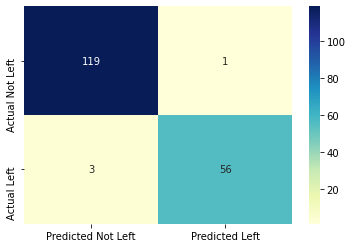

In [96]:
# confusion matrix for Random Forest Classifier

cm = confusion_matrix(y_test, models['Random Forest Classifier'].predict(X_test))
conf_mat = pd.DataFrame(data = cm, columns = ['Predicted Not Left', 'Predicted Left'], index = ['Actual Not Left', 'Actual Left'])
sns.heatmap(conf_mat, annot = True, fmt='d', cmap="YlGnBu")

### 8. Conclusion

The results showed that Random Forest Classifier has outperformed all of the models with 82 percent accuracy and Decision Tree Classifier performed bad.